<a href="https://colab.research.google.com/github/codewithharsha/Machine-Learning-Lab/blob/main/PCA-SVD-LDA_python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

In [89]:
dataset = load_digits()
x = dataset.data
y = dataset.target

In [90]:
x[0]
y_2d = y.reshape(1,-1)

In [91]:
import matplotlib.pyplot as plt

In [92]:
x[0].reshape(8,8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

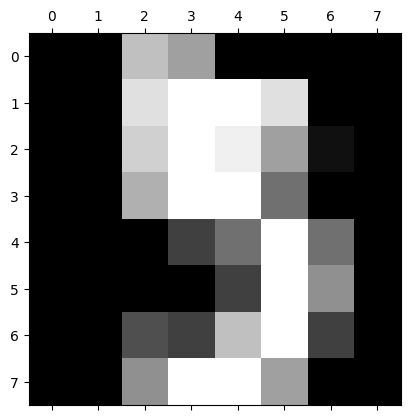

In [93]:
val = x[5].reshape(8,8)
plt.gray()
plt.matshow(val)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)
model = LogisticRegression(max_iter = 4000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
spec = cm[0][0]/cm[0][0]+cm[0][1]
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred,average="micro"))
print(spec)
print(precision_score(y_test,y_pred,average="micro"))
print(f1_score(y_test,y_pred,average="micro"))
print(cohen_kappa_score(y_test,y_pred))

0.975
0.975
1.0
0.975
0.975
0.9721575333636965


In [95]:
# Scaling down the features
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
y_scaled = scalar.fit_transform(y_2d)

Using PCA

In [96]:
pca = PCA(0.90)
x_pca = pca.fit_transform(x_scaled)
x_pca_train,x_pca_tes,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=30)
pca.n_components_

31

In [97]:
model.fit(x_pca_train,y_train)
y_pca_pred = model.predict(x_pca_tes)

In [98]:
cm = confusion_matrix(y_test,y_pred)
spec = cm[0][0]/cm[0][0]+cm[0][1]
print(accuracy_score(y_test,y_pca_pred))
print(recall_score(y_test,y_pca_pred,average="micro"))
print(spec)
print(precision_score(y_test,y_pca_pred,average="micro"))
print(f1_score(y_test,y_pca_pred,average="micro"))
print(cohen_kappa_score(y_test,y_pca_pred))

0.9638888888888889
0.9638888888888889
1.0
0.9638888888888889
0.9638888888888889
0.9597945052490507


Using SVD

In [99]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(30)

In [100]:
x_svd = svd.fit_transform(x_scaled)
x_train_svd,x_test_svd,y_train,y_test = train_test_split(x_svd,y,test_size=0.2,random_state=30)

In [101]:
model.fit(x_train_svd,y_train)
y_svd_pred = model.predict(x_test_svd)

In [102]:
cm = confusion_matrix(y_test,y_pred)
spec = cm[0][0]/cm[0][0]+cm[0][1]
print(accuracy_score(y_test,y_svd_pred))
print(recall_score(y_test,y_svd_pred,average="micro"))
print(spec)
print(precision_score(y_test,y_svd_pred,average="micro"))
print(f1_score(y_test,y_svd_pred,average="micro"))
print(cohen_kappa_score(y_test,y_svd_pred))

0.9638888888888889
0.9638888888888889
1.0
0.9638888888888889
0.9638888888888889
0.9597958868099582


## Using LDA

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=5)
#Note:Here n_components must be <= no.of class varibles unlike the PCA and SVD algorithims

In [104]:
x_lda = lda.fit_transform(x_scaled,y)
x_train_lda,x_test_lda,y_train,y_test = train_test_split(x_lda,y,test_size=0.2,random_state=30)

In [105]:
model.fit(x_train_lda,y_train)
y_pred_lda = model.predict(x_test_lda)

In [106]:
cm = confusion_matrix(y_test,y_pred)
spec = cm[0][0]/cm[0][0]+cm[0][1]
print(accuracy_score(y_test,y_pred_lda))
print(recall_score(y_test,y_pred_lda,average="micro"))
print(spec)
print(precision_score(y_test,y_pred_lda,average="micro"))
print(f1_score(y_test,y_pred_lda,average="micro"))
print(cohen_kappa_score(y_test,y_pred_lda))

0.9138888888888889
0.9138888888888889
1.0
0.9138888888888889
0.9138888888888888
0.9041615856276729
